# Part I - (Ford GoBike system data)
## by Clarisse TOMAVO

## Introduction

### This dataset includes information about individual trips made in a bike-sharing system covering the greater San Francisco Bay Area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_fordgobike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Display of information (column name, column data type, number of non-null records for each column) of our dataset.

In [3]:
'''
Affichons les infos sur notre dataframe à savoir,le nombre total de ligne et de colonne,
les noms des colonnes, le nombre de valeur non nul dans chaque colonne et le type de chaque colonne.
'''
df_fordgobike.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
'''
Généralement nous avons deux sexe humains. Nous allons faire un value counts pour voir les sexe de nos utilisateur et 
egalement le nombre d'user par sexe.
'''
df_fordgobike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Displaying the dimensions of a dataframe

In [5]:
'''
Observons les dimension de notre ensemble de données. A savoir le nombre de ligne et le nombre de colonnes.
'''
df_size= df_fordgobike.shape
print("The row number of our dataframe is : ", df_size[0]," and the column number is : ", df_size[1])

The row number of our dataframe is :  183412  and the column number is :  16


### Displaying the number of null values in each column of the dataframe

In [6]:
''' 
    Let's check if it contains any columns with null values
'''
print("Let's check if it contains any columns with null values.")
df_fordgobike.isna().sum()

Let's check if it contains any columns with null values.


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Let's copy the df_fordbike into a dataframe named df_clean. It is df_clean that we will clean and use for analysis

In [7]:
df_clean= df_fordgobike

### The objective is to carry out exploratory and explanatory analyzes on the routes. For this fact, it is important that we know the ids of the departure stations and the ids of the arrival stations

### Here we notice that we have 197 lines (record) missing station start id and station end id

### We will delete these lines. We assume that for a record where station start id is not filled in is the same for station end id

### Deletion of lines or station start id are empty

In [8]:
index_drop = df_clean[ df_clean['start_station_id'].isna() ].index
# Delete these row indexes from dataFrame
df_clean.drop(index_drop , inplace=True)
df_clean.isna().sum()

print("As guessed it is exactly that.")

As guessed it is exactly that.


### Are we going to delete the rows where the columns member_birth_year ou member_gender sont nulles?
### No, we are not going to delete them.

In [9]:
# The different column values member_gender
member_gender_unique= df_clean['member_gender'].nunique()
gender=df_clean['member_gender'].value_counts()
print("We are  ", member_gender_unique, " unique value, for gender")
print("Here are: ")
gender

We are   3  unique value, for gender
Here are: 


Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### Let's look at the different distinct values of some columns, to see if we're going to convert them to a categorical type.

In [10]:
df_clean['bike_share_for_all_trip'].value_counts()

No     165869
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [11]:
df_clean['user_type'].value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

In [12]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Changing the data type of some columns of our dataframe

In [13]:
def ten_first_caractere (time):
    try:
        time= time.split(" ")[0]
        return time
    except:
        return np.NaN

In [14]:
df_clean['start_time']=df_clean['start_time'].apply(ten_first_caractere)
df_clean['end_time']=df_clean['end_time'].apply(ten_first_caractere)

In [15]:
# 
print("Column cleaning \n\n")
print("start_time, and end_time are are of object type, we will convert them to date time") 
print("\nmember_birth_year is of type float, we will convert it to int")
print("\nThe column bike_share_for_all_trip is of type object. It is qualitative and nominal. It contains two distinct values. We will convert it into a categorical variable")
print("\nThe column user_type is of type object. It is qualitative and nominal. It contains two distinct values. We will convert it into a categorical variable")


col_updt_type=['start_time','end_time','bike_share_for_all_trip','user_type','member_gender','member_birth_year','end_station_id','start_station_id']
type_updt=['datetime64','datetime64','category','category','category','Int64','Int64','Int64']


for i in range(0,8,1):
    df_clean[col_updt_type[i]]=df_clean[col_updt_type[i]].astype(type_updt[i])

Column cleaning 


start_time, and end_time are are of object type, we will convert them to date time

member_birth_year is of type float, we will convert it to int

The column bike_share_for_all_trip is of type object. It is qualitative and nominal. It contains two distinct values. We will convert it into a categorical variable

The column user_type is of type object. It is qualitative and nominal. It contains two distinct values. We will convert it into a categorical variable


## Our df is clean and ready for analysis

In [16]:
dim=df_clean.shape
print("Display the caracteristic of df_clean\n")
print("\nNombre de ligne : ", dim[0])
print("\nNombre de colonne: ", dim[1])
print('\nListe des colonnes: ')
print(df_clean.columns)

Display the caracteristic of df_clean


Nombre de ligne :  183215

Nombre de colonne:  16

Liste des colonnes: 
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


### What is the structure of your dataset?

> The 2019 fordbike dataset which has undergone data wrangling, currently has 183,215 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> Several are the interesting features of our data set. For the orientation of my analysis on this dataframe, the following columns are of interest:
duration_sec, start_time,  user_type, start_station_id, end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Another dataset that will focus on the professional activities of the user_id in order to see the profiles of those who most often use the products of fordBike

### Quelques questions sur lesquelles porteront l'analyse
- What is the category of user who has used fordbike 2019 products for the longest time?
- When are most trips taken in terms of time of day, day of the week, or month of the year?
(Quand la plupart des trajets sont-ils effectués en termes d'heure de la journée, de jour de la semaine ou de mois de l'année ?)
- How long does the average trip take?
(- Combien de temps dure le trajet moyen ?)
- How long does a journey take on average according to the category of users?
- Which age group uses the fordbike bicycle system the most?
- The youngest? The oldest?
- What are the stations that are the most for the start of the bicycle races?
- What are the stations that are the most for the end of the bicycle races?

## Summary statistical description on the df_clean data frame

In [17]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,174952.000000
mean,725.902017,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1984.803135
std,1795.078654,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Remark.
### Our dataset has a problem. An average calculation should not be applied to the start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id and member_birth_year columns.
### By default, as these columns are of quantitative type, the summary and descriptive statistics apply to them.
### We need to bring them back to object type, because applying summary and descriptive statistics on such columns is bad.

## Let's convert them to an object

In [18]:
def convert_to_objet(list_col):
    for i in range(0,len(list_col),1):
        df_clean[list_col[i]]=df_clean[list_col[i]].astype('object')

In [19]:
list_col=['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id','member_birth_year']
convert_to_objet(list_col)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  object        
 6   start_station_longitude  183215 non-null  object        
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  object        
 10  end_station_longitude    183215 non-null  object        
 11  bike_id                  183215 non-null  object        
 12  user_type       

### We need to know the months when there is more use of ford bicycles
### We also need to know the days when cycling trips are most in demand.
### For this, we are going to focus on start_time, and from this column, we are going to retrieve the month and the day with the dt.month_name method (to have the name of the month of each start_time) and dt.day_name()
### Let's create these two columns

In [21]:
df_clean['start_month']=df_clean['start_time'].dt.month_name()

df_clean['start_day']=df_clean['start_time'].dt.day_name()
print("Nous remarquons que deux colonnes respectivement start_month et start_day sont bien crée et contiennet exactement respectivement le nom du mois, le jour de chaque start_time correspondant.\n")
print('Nice. Vive la class dt')
df_clean.head()


Nous remarquons que deux colonnes respectivement start_month et start_day sont bien crée et contiennet exactement respectivement le nom du mois, le jour de chaque start_time correspondant.

Nice. Vive la class dt


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day
0,52185,2019-02-28,2019-03-01,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,February,Thursday
1,42521,2019-02-28,2019-03-01,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.77588,-122.39317,2535,Customer,<NA>,NaN,No,February,Thursday
2,61854,2019-02-28,2019-03-01,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,February,Thursday
3,36490,2019-02-28,2019-03-01,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,February,Thursday
4,1585,2019-02-28,2019-03-01,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,February,Thursday


In [22]:
df_clean.describe()

,duration_sec
count,183215.000000
mean,725.902017
std,1795.078654
min,61.000000
25%,325.000000
50%,514.000000
75%,796.000000
max,85444.000000


## Avons nous de valeur abberante dans la colonne age

''

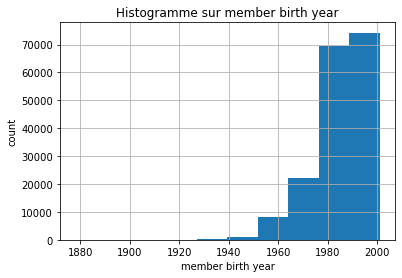

In [23]:
df_clean['member_birth_year'].hist()
plt.xlabel('member birth year')
plt.ylabel('count')
plt.title('Histogramme sur member birth year')
;

### <p style='color:red'>Conclusion</p>
### On this dataset we notice that Ford GoBike system has many customers in 2019 who use its system whose age group is [1978,2001]

### Conclusion
### From the result of the statistics summary, we deduce that on average the duration of a trip is 725.90 seconds or min. The minimum, maximum duration is 61 seconds and 85444 seconds respectively

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### <p style='color:red'> Question1 </p>
### Number of different stations recorded where a trip started.
### <p style='text-decoration:underline'> Code</p>

In [24]:
unique_start_id=df_clean['start_station_id'].unique()
unique_end_id=df_clean['end_station_id'].unique()
print('\nNumber of different stations recorded where a trip started is : ',df_clean['start_station_id'].nunique())
print('\nNumber of different stations recorded where a trip ended is : ',df_clean['end_station_id'].nunique())

print("\nLet's check if the station ids seen at the start level are all also at the end station level.")
print("\nOrdered list of all start station id and all end station id.")
print("\nLet's compare these two lists.")
cp_unique_start_id=unique_start_id
cp_unique_end_id=unique_end_id
cp_unique_start_id.sort()
cp_unique_end_id.sort()
unique_start_id

#if (unique_start_id==unique_end_id)
    
    
print("\nThe id at start station id are the same as at end station.")


Number of different stations recorded where a trip started is :  329

Number of different stations recorded where a trip ended is :  329

Let's check if the station ids seen at the start level are all also at the end station level.

Ordered list of all start station id and all end station id.

Let's compare these two lists.

The id at start station id are the same as at end station.


### <p style='color:red'> Conclusion1 : </p>
### All the trip departure station IDs are all present at the trip end stations. And vice versa.
### This leads us to conclude that all start station ids are used for end of trip stations. Sometimes a station serves as a departure for a journey, sometimes it serves as a destination for a journey.

### <p style='color:red'>Question 2</p>
### Top 10 stations with the most starting points for the trip.
### <p style='text-decoration: underline'> Code</p>

In [25]:
def allInfosTopEndStation(col1,col2):
    #Recupération des top 10
    top_10 = df_clean[col1].value_counts()[:10]
    #Conversion en dataframe
    df_top_10=pd.DataFrame(top_10)
    #Rénitialisation de l'index avec reset_index puisque le dataframe conçu prend les id de station comme son index
    #Alors que nous la voulons comme une colonne.
    df_top_10=df_top_10.reset_index()
    #Renommage des colonnes du dataframe
    df_top_10=df_top_10.rename(columns={'index':'id',col1:'count_trip'})
    liste=[]
    #Recupération du nom,de la longitude et de la latitude de tous ces top 10 start_id
    for i in range(0,len(df_top_10['id']),1):
        id_current=df_top_10['id'].iloc[i] 
        name=df_clean.query('end_station_id == @id_current')[[col2+'_station_name',col2+'_station_longitude',col2+'_station_latitude']][:1] 
        name_id=name[col2+'_station_name'].iloc[0]
        latitude_id= name[col2+'_station_latitude'].iloc[0]
        longitude_id= name[col2+'_station_longitude'].iloc[0]
        liste.append({'id': id_current, 'name':name_id,'lat':latitude_id,'long':longitude_id,'count_trip':df_top_10['count_trip'].iloc[i]})
    return pd.DataFrame (liste)


In [26]:
def allInfosTopStation(col1,col2):
    #Recupération des top 10
    top_10 = df_clean[col1].value_counts()[:10]
    #Conversion en dataframe
    df_top_10=pd.DataFrame(top_10)
    #Rénitialisation de l'index avec reset_index puisque le dataframe conçu prend les id de station comme son index
    #Alors que nous la voulons comme une colonne.
    df_top_10=df_top_10.reset_index()
    #Renommage des colonnes du dataframe
    df_top_10=df_top_10.rename(columns={'index':'id',col1:'count_trip'})
    liste=[]
    #Recupération du nom,de la longitude et de la latitude de tous ces top 10 start_id
    for i in range(0,len(df_top_10['id']),1):
        id_current=df_top_10['id'].iloc[i] 
        name=df_clean.query('start_station_id == @id_current')[[col2+'_station_name',col2+'_station_longitude',col2+'_station_latitude']][:1] 
        name_id=name[col2+'_station_name'].iloc[0]
        latitude_id= name[col2+'_station_latitude'].iloc[0]
        longitude_id= name[col2+'_station_longitude'].iloc[0]
        liste.append({'id': id_current, 'name':name_id,'lat':latitude_id,'long':longitude_id,'count_trip':df_top_10['count_trip'].iloc[i]})
    return pd.DataFrame (liste)


In [27]:
print("Voici les 10 stations qui ont été plus de point de départ pour destrajets des customers.")
allInfosTopStation('start_station_id','start')

Voici les 10 stations qui ont été plus de point de départ pour destrajets des customers.


,id,name,lat,long,count_trip
0,58,Market St at 10th St,37.776619,-122.417385,3904
1,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3544
2,81,Berry St at 4th St,37.775880,-122.393170,3052
3,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2895
4,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2760
5,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2710
6,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2703
7,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2327
8,22,Howard St at Beale St,37.789756,-122.394643,2293
9,16,Steuart St at Market St,37.794130,-122.394430,2283


In [28]:
allInfosTopStation('start_station_id','start')['name']

0                                 Market St at 10th St
1    San Francisco Caltrain Station 2  (Townsend St...
2                                   Berry St at 4th St
3     Montgomery St BART Station (Market St at 2nd St)
4         Powell St BART Station (Market St at 4th St)
5    San Francisco Ferry Building (Harry Bridges Pl...
6       San Francisco Caltrain (Townsend St at 4th St)
7         Powell St BART Station (Market St at 5th St)
8                                Howard St at Beale St
9                              Steuart St at Market St
Name: name, dtype: object

### Les stations les plus utilisés pour le start_time en graphe

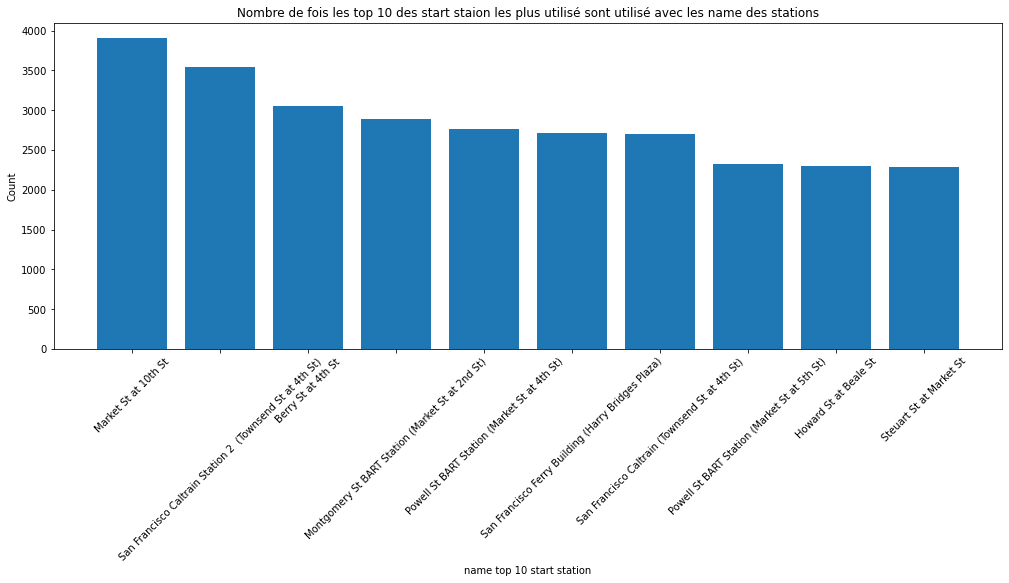

In [29]:
data_info=allInfosTopStation('start_station_id','start')
plt.figure(figsize=(17,6))
plt.bar(data_info['name'],data_info['count_trip'])
plt.xlabel("name top 10 start station")
plt.ylabel("Count")
plt.title("Nombre de fois les top 10 des start staion les plus utilisé sont utilisé avec les name des stations")
plt.xticks(rotation=45);

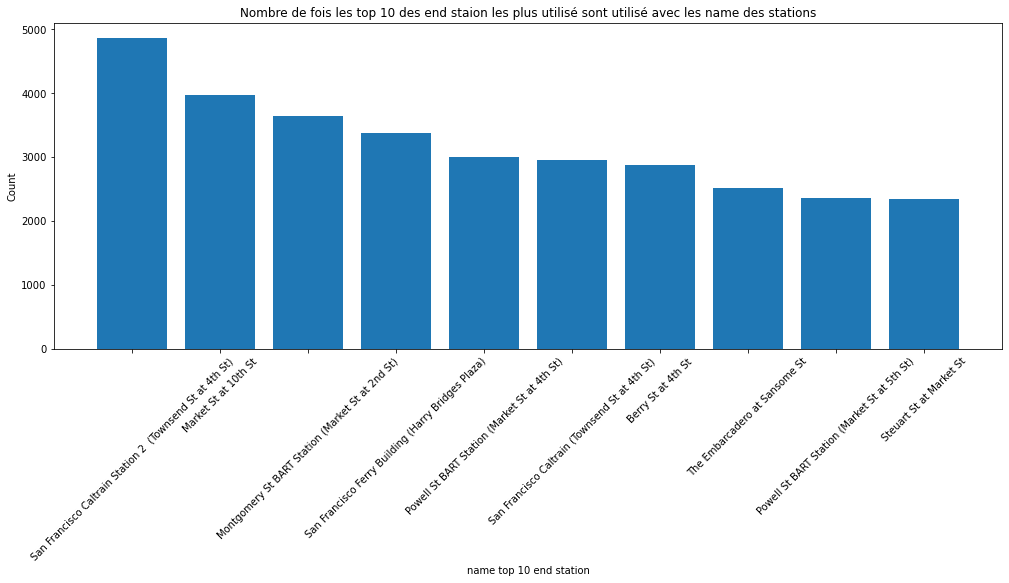

In [30]:
data_info1=allInfosTopEndStation('end_station_id','end')
plt.figure(figsize=(17,6))
plt.bar(data_info1['name'],data_info1['count_trip'])
plt.xlabel("name top 10 end station")
plt.ylabel("Count")
plt.title("Nombre de fois les top 10 des end staion les plus utilisé sont utilisé avec les name des stations")
plt.xticks(rotation=45);

In [31]:
print("Voici les 10 stations qui ont été plus de point de destination pour des trajets des customers.")
allInfosTopEndStation('end_station_id','end')

Voici les 10 stations qui ont été plus de point de destination pour des trajets des customers.


,id,name,lat,long,count_trip
0,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4857
1,58,Market St at 10th St,37.776619,-122.417385,3973
2,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3647
3,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3368
4,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2997
5,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2947
6,81,Berry St at 4th St,37.775880,-122.393170,2872
7,6,The Embarcadero at Sansome St,37.804770,-122.403234,2512
8,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2353
9,16,Steuart St at Market St,37.794130,-122.394430,2338


### <p style='color:red'> Conclusion2: </p>
### Here above are the 10 stations that have had the most starting points for the trip and the 10 concerning the destination stations (end of the trip).
### Knowing these stations can help make billboards near these stations.

### <p style='color:red'> Question3:</p>
### The number of trips made by each client group.

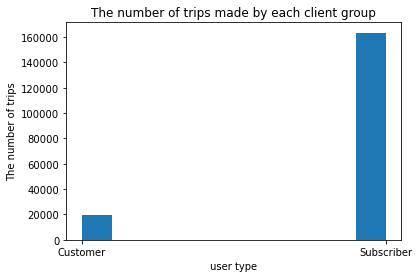

In [32]:
plt.hist(df_clean['user_type'])
plt.xlabel("user type")
plt.ylabel("The number of trips")
plt.title("The number of trips made by each client group");

### <p style='color:red'>Conclusion3:</p>
### We notice that we have two types of users, Subscriber users use more than Customer users

### <p style='color:red'> Question4:</p>
### What are the top 3 months with most usage for the start of the journey?
### This will allow you to know how many bikes you need to make available each month. And also to know the most profitable months.
### <p style='text-decoration: underline'>Code</p>

In [33]:
df_clean['start_month'].value_counts()

February    183215
Name: start_month, dtype: int64

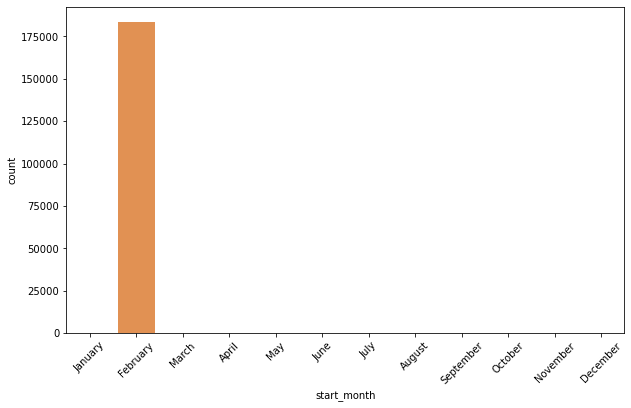

In [34]:
## Let's retrieve the months of each journey start
ordered_month=[ 'January','February','March','April','May','June','July','August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10,6))
sb.countplot(data=df_clean, x='start_month', order=ordered_month)
plt.xticks(rotation=45);

### <p style='color:red'>Conclusion4:</p>
### Unfortunately, our dataframe only contains trips made in the month of February.
### I could not make a difference, nor a comparison to have the months which are the most used.

### <p style='color:red'>Question5:</p>
### Let's take a closer look at the days of the week when many of the bike rides using the ford bike system.
### <p style='text-decoration:underline'>Code</p>

Observons les jours de la semaine.


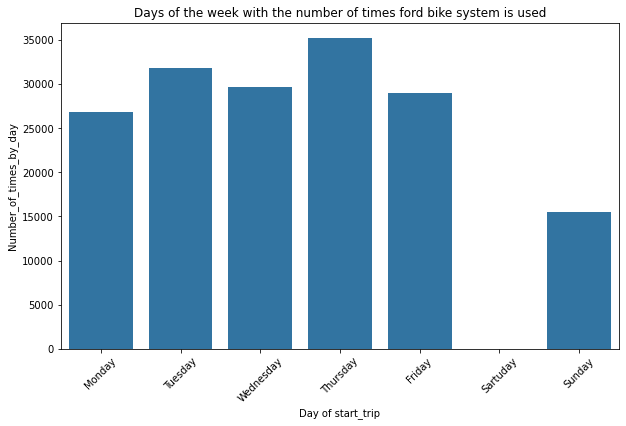

In [35]:
## 
print('Observons les jours de la semaine.')
ordered_day=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Sartuday','Sunday']
plt.figure(figsize=(10,6))
theme_color=sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_day', order=ordered_day, color=theme_color)
plt.xticks(rotation=45)
plt.xlabel('Day of start_trip')
plt.ylabel('Number_of_times_by_day')
plt.title('Days of the week with the number of times ford bike system is used');

### <p style='color:red'> Conclusion5</p>
### 0 trips were made on Saturday using the ford bike system.
### The top 3 days when there is more use of Ford bikes are: Thursday, Tuesday, Friday.
### <p style='color:red'> Question6</p>
### Le pourcentage par sexe des utilisateurs du systeme de ford.
### <p style='text-decoration: underline'>Code</p>

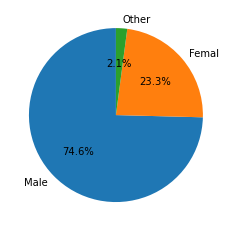

In [36]:
gender_label=['Male','Femal','Other']
gender=df_clean['member_gender'].value_counts()
plt.pie(gender, labels = gender_label, startangle = 90, counterclock = True,autopct='%1.1f%%');

### <p style='color:red'>Conclusion 7</p>
### Of the 100% users, 74.6% are male; 23.3% of users are women and 2.1% are from other systems.
### <p style='color:red'>Question 8: </p>
### Let's evaluate the rate of people who use the self-service bicycle for all trips

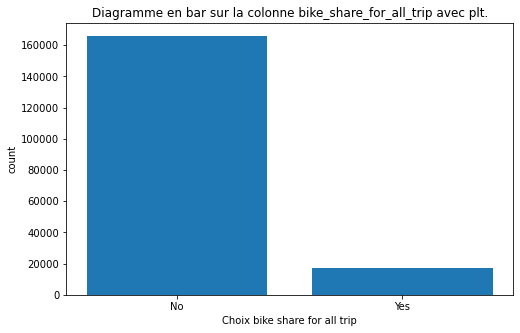

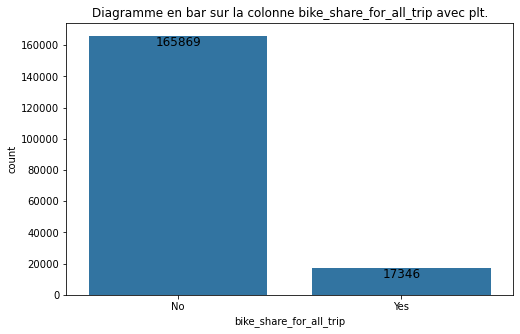

In [37]:
bike_share = df_clean['bike_share_for_all_trip'].unique()

number = df_clean['bike_share_for_all_trip'].value_counts(sort=True)

plt.figure(figsize=(8,5))
plt.bar(bike_share, number)
plt.xlabel('Choix bike share for all trip')
plt.ylabel('count')
plt.title('Diagramme en bar sur la colonne bike_share_for_all_trip avec plt.')
plt.show();

plt.figure(figsize=(8,5))
base_color = sb.color_palette()[0]
ax = sb.countplot(data=df_clean, x ='bike_share_for_all_trip', color=base_color)
cat_counts = df_clean['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, va='top', ha='center', color = 'black', fontsize=12)

plt.title('Diagramme en bar sur la colonne bike_share_for_all_trip avec plt.')
plt.show();


### <p style='color:red'>Conclusion 8</p>
### Of the 183,215, recording, 165,869 opt for No for bike sharing during a trip and 17,346 opt for Yes for bike sharing during their trip.


## Fin visualisation Univarié Résumé

### Discuss the distribution(s) of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

The variables on which I performed univariate visualizations are all interesting. We were able to observe on average the duration of a journey, the 10 top 10 most used stations for departures, the 10 top 10 most used stations for journey ends.
We were also able to discover that only trips for the month of February 2019 are recorded in our dataset.
We were also able to observe the types of customers who use our system the most.

### Among the features you investigated, were there any unusual distributions? Did you perform any data operations to tidy, adjust, or change the shape of the data? If so, why did you do this?

I had to perform operations (like cleaning, adjusting, reshaping) on ​​the data before I could plot what's behind it

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### <p style='color:red'>Question b1</p>
### How many trips do we have per day according to the type of users
### <p style='text-decoration:underline'>Code</p>

In [38]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day
0,52185,2019-02-28,2019-03-01,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,February,Thursday
1,42521,2019-02-28,2019-03-01,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.77588,-122.39317,2535,Customer,<NA>,NaN,No,February,Thursday
2,61854,2019-02-28,2019-03-01,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,February,Thursday
3,36490,2019-02-28,2019-03-01,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,February,Thursday
4,1585,2019-02-28,2019-03-01,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,February,Thursday


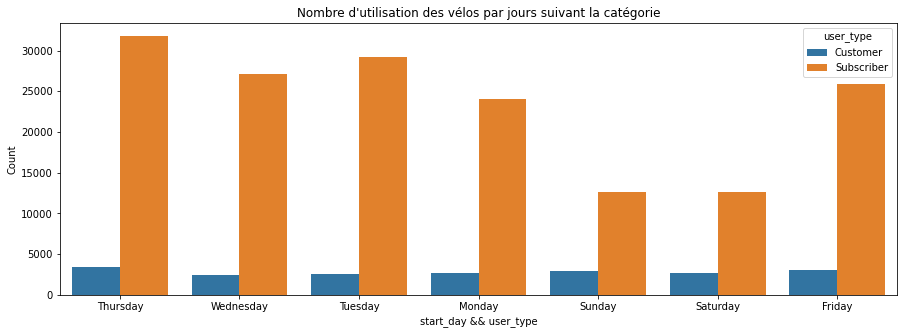

In [39]:
plt.figure(figsize=(15,5))
sb.countplot(data = df_clean, x = 'start_day', hue= 'user_type')
plt.xlabel("start_day && user_type")
plt.ylabel('Count')
plt.title("Nombre d'utilisation des vélos par jours suivant la catégorie");

### <p style='color:red'> Conclusion b1</p>
### There is no day when 'customer' type users use the system as 'subscriber' type users
### On Thursdays, both types of user use the bike system a lot more.
### <p style='color:red'>Questionb2</p>
### How many trips do we have per month by type of users
### <p style='text-decoration:underline'>Code</p>

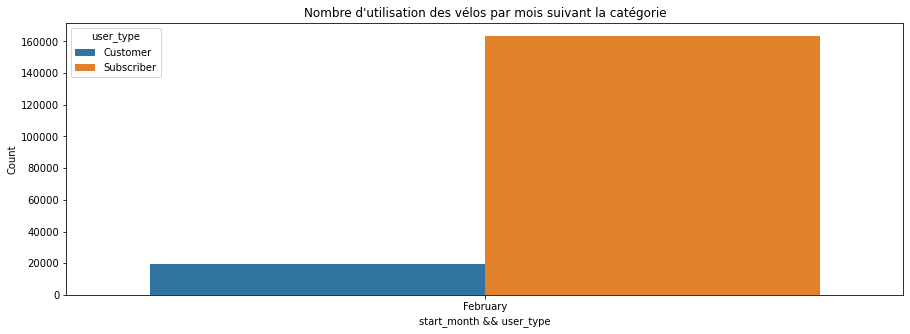

In [40]:
plt.figure(figsize=(15,5))
sb.countplot(data = df_clean, x = 'start_month', hue= 'user_type')
plt.xlabel("start_month && user_type")
plt.ylabel('Count')
plt.title("Nombre d'utilisation des vélos par mois suivant la catégorie");

### <p style='color:red'> Conclusion b2</p>
### Nous avons malheureusement juste les enregistrements d'un seul mois et c'est Février. En février,les subscriber ont plus utilisé le système que les customer

### <p style='color:red'>Questionb3</p>
### How close are the 10 best departure stations for journey
### <p style='text-decoration:underline'>Code</p>

### <p style='color:red'> Conclusion b2</p>
### Nous avons malheureusement juste les enregistrements d'un seul mois et c'est Février. En février,les subscriber ont plus utilisé le système que les customer

### <p style='color:red'>Questionb3</p>
### How close are the 10 best departure stations for journey
### <p style='text-decoration:underline'>Code</p>

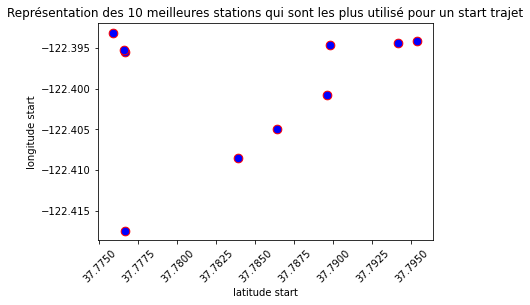

In [41]:
plt.scatter(x=data_info['lat'],y=data_info['long'], c='b', s=75, edgecolor='r')
plt.title('Représentation des 10 meilleures stations qui sont les plus utilisé pour un start trajet')
plt.xlabel('latitude start')
plt.ylabel('longitude start')
plt.xticks(rotation=45);

### <p style='color:red'> Conclusionb3</p>
### Les 10 meilleurs start station sont pas reprochés. Leur represenation suivant la latitude et leur longitude se ressemble pas.

### <p style='color:red'>Questionb4</p>
### How close are the 10 best arrival stations for journey
### <p style='text-decoration:underline'>Code</p>

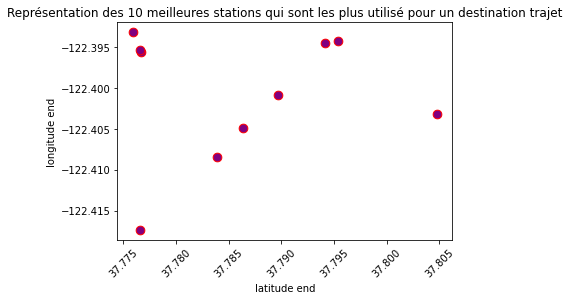

In [42]:
plt.scatter(x=data_info1['lat'],y=data_info1['long'], c='purple', s=75, edgecolor='r')
plt.title('Représentation des 10 meilleures stations qui sont les plus utilisé pour un destination trajet')
plt.xlabel('latitude end')
plt.ylabel('longitude end')
plt.xticks(rotation=45);

### <p style='color:red'> Conclusionb4</p>
### Les 10 meilleurs end station ne sont pas reprochées. Leurs represenations suivant la latitude et leur longitude se ressemblent pas.

### <p style='color:red'>Questionb5</p>
### What is the average duration performed by each type of user?
### <p style='text-decoration:underline'>Code</p>

Durée moyenne du temps passé pour les trajets par les deux types d'utilisateur du système.

            duration_sec
user_type               
Customer     1433.475734
Subscriber    640.164766


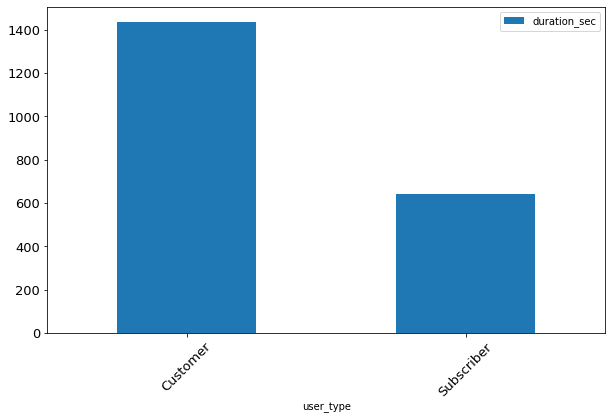

In [43]:
df_duration_by_user = df_clean[['user_type', 'duration_sec']].groupby('user_type').mean()
print("Durée moyenne du temps passé pour les trajets par les deux types d'utilisateur du système.\n")
print(df_duration_by_user)
df_duration_by_user.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13)
plt.xticks(rotation=45);

### <p style='color:red'>Conclusionb6</p>
### Nous avons remarqué que la durée des customer est tellemnt plus grande que celle d'un abonnée.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Il existe une sorte de corrélation entre la durée et le type d'utilisateur, les abonnés ayant tendance à avoir des temps d'utilisation plus courts que les clients.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

### Fin bivariate exploration

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

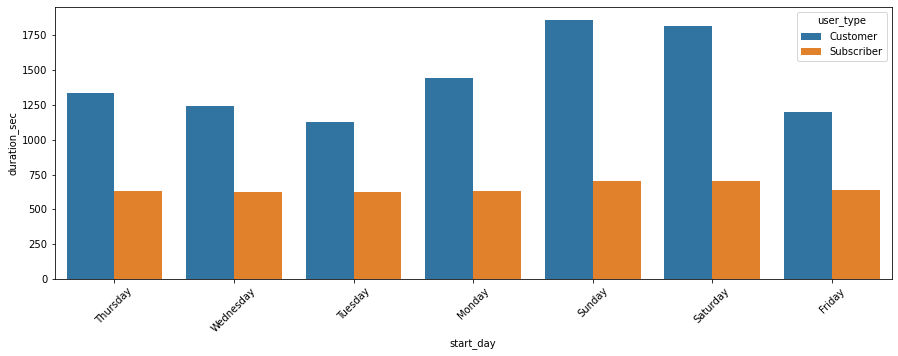

In [44]:
plt.figure(figsize=(15,5))
sb.barplot(data=df_clean, x='start_day', y='duration_sec', ci=None, hue='user_type')
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

### <p style='color:red'>Conclusions</p>
We explored this dataset wonderfully. It's really interesting. We could notice
- the days when there is more use of bicycles
- The top 10 departures
- the top 10 end_station
- we were also able to observe their proximity
- types of users
- the types of users who use the system the most
- the types of user who make more time during their journey.

In [45]:
### Convertions du df clean en csv
df_clean_csv=df_clean.to_csv('df_clean_csv.csv', index=False)

In [46]:
pd.read_csv('df_clean_csv.csv')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day
0,52185,2019-02-28,2019-03-01,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February,Thursday
1,42521,2019-02-28,2019-03-01,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February,Thursday
2,61854,2019-02-28,2019-03-01,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February,Thursday
3,36490,2019-02-28,2019-03-01,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February,Thursday
4,1585,2019-02-28,2019-03-01,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,480,2019-02-01,2019-02-01,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,February,Friday
183211,313,2019-02-01,2019-02-01,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,February,Friday
183212,141,2019-02-01,2019-02-01,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,February,Friday
183213,139,2019-02-01,2019-02-01,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,February,Friday


### <p style='color:red'> Merciiiiiiiii ALX-T! </p>

### <p style='text-decoration:underline; text-align:right'>11/11/2022 </p>